Tonalité: Killing me = F mineur F G G# A# C D D# 

Tonalité: Billy Jean = F# mineur F# G# A B C# D# F#

Tonalité: Forever Man = Bb majeur (Lydian) Bb C D E F G A

Tonalité: I love Rnr = Em mineur harmonique E 

Let it be = C majeur

Get Lucky = B mineeur


In [64]:
import guessnote as guessnote
from importlib import reload 
reload(guessnote)
#SFFT,Sx_dB=guessnote.getSFFT("content/killme.wav",-5,FFT_WINDOW_SECONDS = 1)
#bornes=guessnote.buildScale(tolerance=1/40)
#guessnote.mapFreq2Note(SFFT, Sx_dB,bornes)

guessnote.serialize("content/killme.wav",tolerance=1/40,attenuationfloordb=-5,FFT_WINDOW_SECONDS = 1)

 


    

max Sx_dB -13.26555638563451
Map2note
Serializing file content/killme.npy
End of serialization content/killme.npy


In [12]:
inv_map = guessnote.getMapFreq2Note(SFFT,bornes)
#print(inv_map)

notetable=np.full((len(bornes)+1,Sx_dB.shape[1]),-50.)
# On parcours tous les instants du spectrogramme.
for i in range(Sx_dB.shape[1]):
    #Pour chaque bin de fréquence (note ou intervalle entre note) nous aggrégeons sur la puissance maximale de de fréquence
    for k,v in inv_map.items():
#        print(k)
#        print(Sx_dB[v,i])
        notetable[k,i]=np.max(Sx_dB[v,i])   

array([0.0000e+00, 2.0000e+00, 4.0000e+00, ..., 2.3996e+04, 2.3998e+04,
       2.4000e+04])

In [65]:
import numpy as np


X=np.load("content/killme.npy")
X

array([[-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       ...,
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.]])

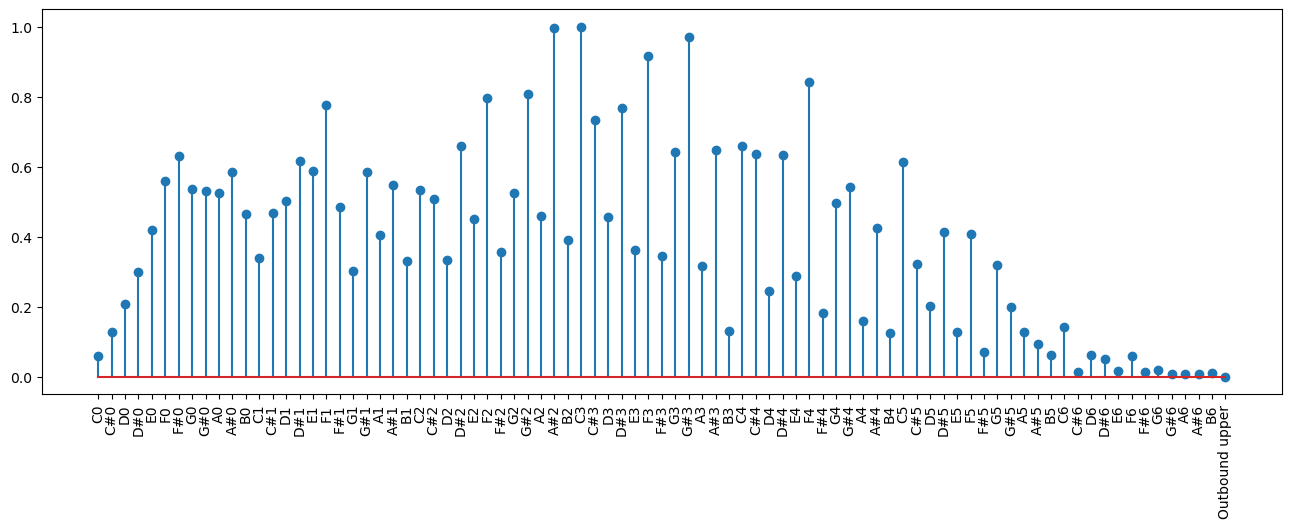

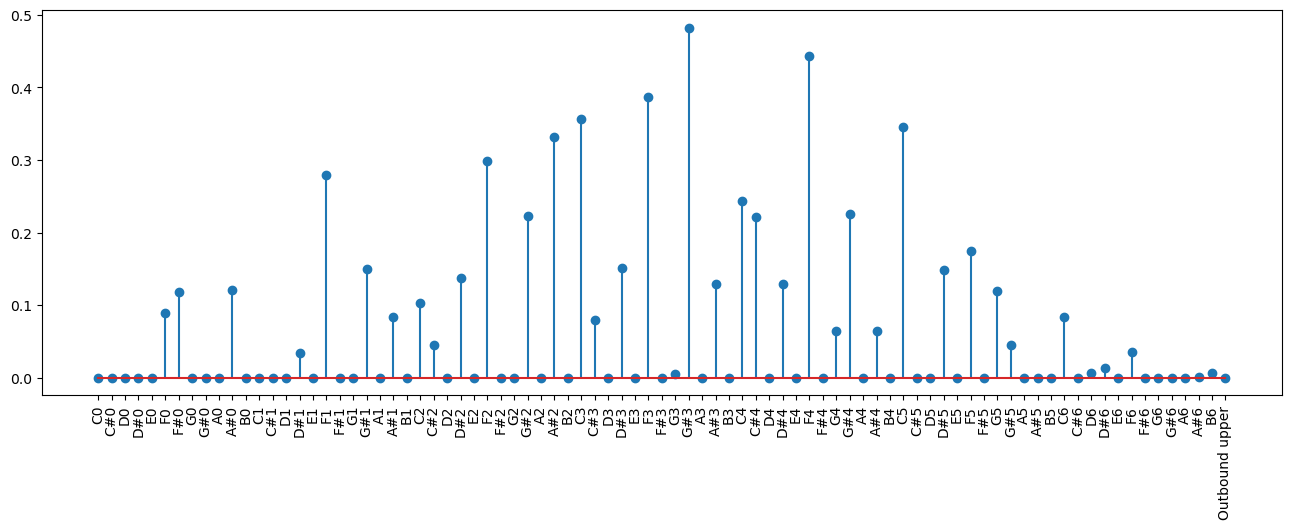

In [111]:
import re
import matplotlib.pyplot as plt

X=np.load("content/killme.npy")
plt.rcParams['figure.figsize'] = [16, 5]

tona=X.sum(axis=1)
tona=tona-np.min(tona)
tona=tona/np.max(tona)
tona=tona[range(1,len(tona),2)]

convolvevect=[-.25,-.25,1,-.25,-.25]
tonaconvolved=np.convolve(tona,convolvevect,mode='same')
tonaconvolved=tonaconvolved.clip(min=0)

binsids=np.where(tonaconvolved>.2)[0]+1
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]]) 


plt.stem(tona)
plt.xticks(range(0,len(tona)),keyboard[1:],rotation=90)
plt.show()



plt.stem(tonaconvolved)
plt.xticks(range(0,len(tona)),keyboard[1:],rotation=90)
plt.show()


In [172]:
import re
import matplotlib.pyplot as plt
import pandas as pd

X=np.load("content/killme.npy")
plt.rcParams['figure.figsize'] = [16, 5]

tona=X.sum(axis=1)
tona=tona-np.min(tona)
tona=tona/np.max(tona)
tona=tona[range(1,len(tona),2)]

convolvevect=[-.25,-.25,1,-.25,-.25]
tonaconvolved=np.convolve(tona,convolvevect,mode='same')
tonaconvolved=tonaconvolved.clip(min=0)


binsids=np.where(tonaconvolved>.2)[0]+1
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]]) 

note=[i%12 for i in range(len(tonaconvolved))]
print(note)
dftona=pd.DataFrame(tonaconvolved,columns=["powerfreqnote"])
dftona["note"]=[i%12 for i in dftona.index]
signature=dftona.groupby("note").sum()
signature=signature/signature.max()

bestreso=0
bestresogamme=''
bestresopremierdegre=0
for gamme in gammes.columns:
    #print(gamme)
    weight=gammes[gamme]
    for i in range(12):
        #print('premier degre',i)
        signature['weight']=np.roll(weight,i)
        resonnancedegamme=(signature['weight']*signature['powerfreqnote']).sum()
        if resonnancedegamme>bestreso:
            bestreso=resonnancedegamme
            bestresogamme=gamme
            bestresopremierdegre=i
print("Gamme",bestresogamme,"Premier degre",bestresopremierdegre)
            
        
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0]
Gamme minnat Premier degre 5


In [163]:
(signature['weight']*signature['powerfreqnote']).sum()

0.9707173734650161

In [86]:
binsids=np.where(tonaconvolved>.2)[0]+1
binsids
print(keyboard[binsids])
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]])

['F1' 'F2' 'G#2' 'A#2' 'C3' 'F3' 'G#3' 'C4' 'C#4' 'F4' 'G#4' 'C5']


array(['A#', 'C', 'C#', 'F', 'G#'], dtype='<U2')

In [109]:
import guessnote as guessnote
from importlib import reload 
reload(guessnote)
X=np.load("content/killme.npy")
guessnote.getMainNotes(X)


[ 1  2  6  9 11]
['A#' 'C' 'C#' 'F' 'G#']


array([ 0,  1,  5,  8, 10])

In [169]:
majeure=[0,2,4,5,7,9,11]
mineurharmonique=[0,2,3,5,7,8,11]

weightmajeure=[1,0,1/5,0,1/4,1/4,0,1/2,0,1/5,0,1/4]
weightmineurharmonique=[1,0,1/5,1/4,0,1/4,0,1/2,1/5,0,0,1/4]
weightmineurnaturel=[1,0,1/5,1/4,0,1/4,0,1/2,1/5,0,1/4,0]
weightmelodiqueasc=[1,0,1/5,1/4,0,1/4,0,1/2,0,1/5,0,1/4]
weightmelodiquedesc=[1,0,1/5,1/4,0,1/4,0,1/2,1/5,0,1/4,0]

mineurnaturel=[0,2,3,5,7,8,10]
mineurmelodiqueasc=[0,2,3,5,7,9,11]
mineurmelodiquedesc=[0,2,3,5,7,8,10]

gammes=pd.DataFrame({"majeur":weightmajeure,"minharm":weightmineurharmonique,"minnat":weightmineurnaturel,"melasc":weightmelodiqueasc,"meldesc":weightmelodiquedesc})

In [147]:
len(weight)

12

(0.0, 100.0)

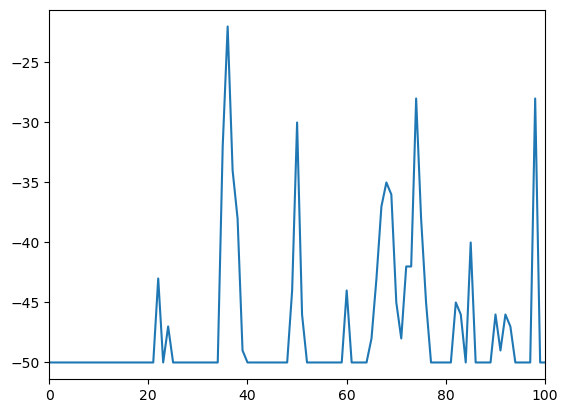

In [12]:
import matplotlib.pyplot as plt
#plt.imshow(X, origin='lower')
plt.plot(X[:,1500])
plt.xlim(0,100)

In [5]:
from math import log2
from math import pow

# Constants
# The scale of note
notescale=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
# The log2 increment of a semi-tone log2(2)/12= 1/12
increment=1/12
# The log2 representation of the A440 that is used as reference for our scale.
alog=log2(440)
#The bin boundary in frequency for each tone
bornes=[]

# Construction de la table mappant table vers index de note.
mapftonote={}
# This create some bins for a scale with for each note a lower bound and an upper bound. 
from math import log2
from math import pow

notescale=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
increment=1/12
tolerance=1/30
alog=log2(440)
bornes=[]
notes=[]

# construction all notes fundamental frequency interval above A3
# you can compupte the span above A in octave with the formula
# (range - distance to above C) /2   ==> 39-3 / 12 = 3
for i in range(39):
    lowerbound=pow(2,alog+increment*i-tolerance)
    upperbound=pow(2,alog+increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])
bornes.extend([upperbound])
# construction all notes fundamental frequency interval below A3
# you can compupte the span below A in octave with the formula
# (range - distance to below C) /2   ==> 46 - 10 / 2

for i in range(1,46):
    lowerbound=pow(2,alog-increment*i-tolerance)
    upperbound=pow(2,alog-increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])

bornes.extend([-1])
bornes.sort()
keyboard=["OutBoundLower"]
for i in range (0,7):
    for j in notescale:
        notename=j+str(i)
        keyboard.append(notename)
keyboard.append("Outbound upper")

keyboard=np.array(keyboard)
len(bornes)//2
#len(keyboard)
len(keyboard)


86